In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [36]:
insurance = pd.read_csv("insurance.csv")

In [37]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
insurance_dummies = pd.get_dummies(insurance,drop_first=True)

<AxesSubplot:>

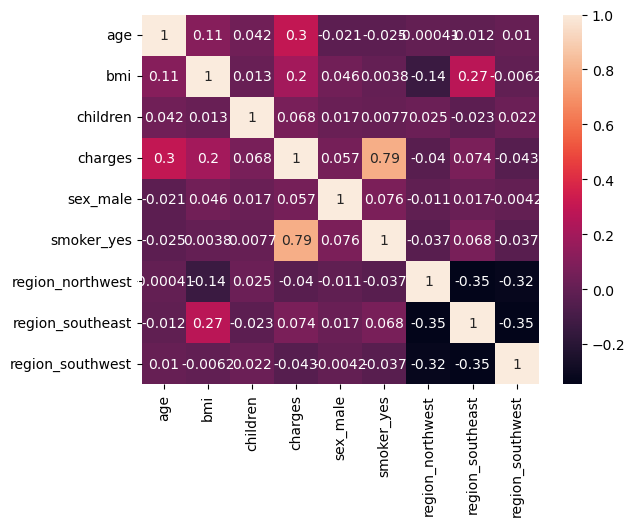

In [39]:
sns.heatmap(insurance_dummies.corr(),annot=True)

array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

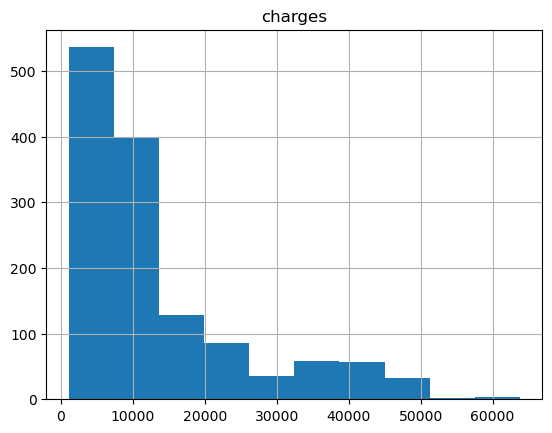

In [40]:
insurance.hist("charges")

We must log transform to get unbiased errors

array([[<AxesSubplot:title={'center':'log_charges'}>]], dtype=object)

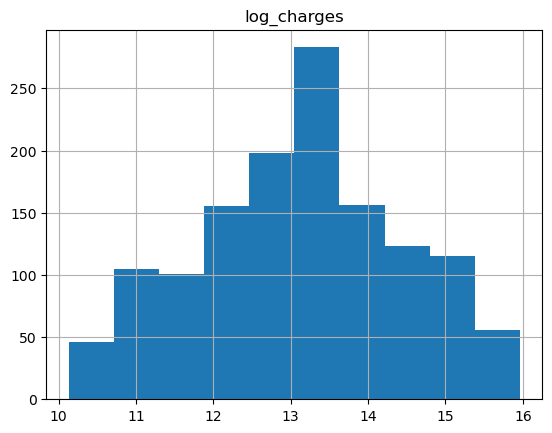

In [41]:
insurance["log_charges"] = np.log2(insurance["charges"])

insurance.hist("log_charges")

<AxesSubplot:title={'center':'log_charges'}, xlabel='region'>

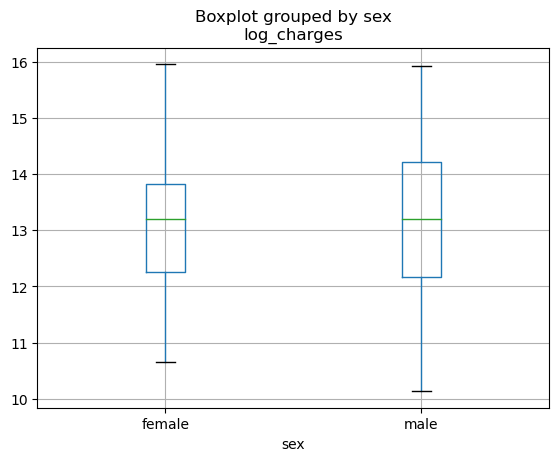

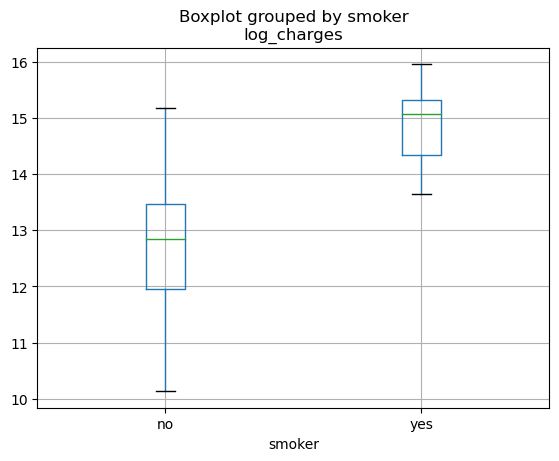

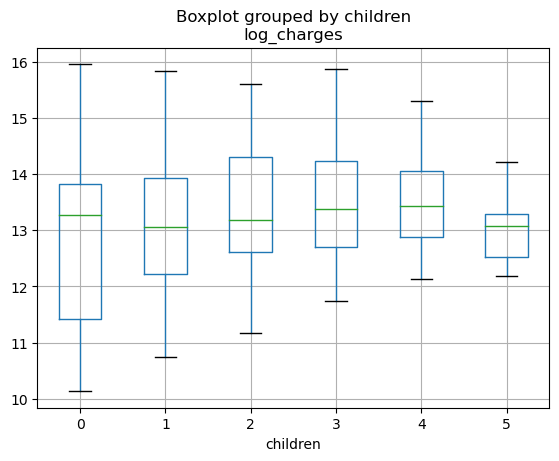

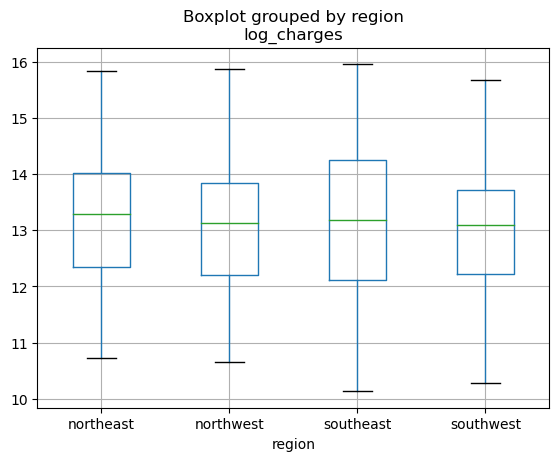

In [42]:
insurance.boxplot(column = ["log_charges"], by = "sex")
insurance.boxplot(column = ["log_charges"], by = "smoker")
insurance.boxplot(column = ["log_charges"], by = "children")
insurance.boxplot(column = ["log_charges"], by = "region")

In [ ]:
# Splitting the data up into a training and test set
insurance["is_smoker"] = (insurance["smoker"] == "yes")
X = insurance[["age", "bmi", "is_smoker"]]
y = insurance["log_charges"]

# 75% for training set, 25% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 1)

In [ ]:
# Training and checking model performance on training set
insurance_model = LinearRegression()
insurance_model.fit(X_train, y_train)
# Get predicted values by model
y_pred = insurance_model.predict(X_train)

# MSE on the log scale for the insurance charges
mean_squared_error(y_train, y_pred)
# MSE on the original scale for the insurance charges
np.exp(mean_squared_error(y_train, y_pred))
# Coefficient of determination
r2_score(y_train, y_pred)# Quick visual check of residuals
check = pd.DataFrame()
check["residuals"] = y_train - y_pred
check["fitted"] = y_pred

check.plot.scatter(x = "fitted", y = "residuals")

In [ ]:
# Getting the non-intercept coefficients
insurance_model.coef_

In [43]:


# Getting MSE on test model
test_pred = insurance_model.predict(X_test)

mean_squared_error(y_test, test_pred)

# Putting the outcome (in log-terms) back into the original scale
np.exp(mean_squared_error(y_test, test_pred))
     


NameError: name 'insurance_model' is not defined